# Face-Tagging / Face Clustering

In face Tagging we need to perform unsupervised learning — we have only the faces themselves with no names/labels. From there we need to identify and count the number of unique people in a dataset.


## Where it may be used in real world
### lets see a fictious example
Consider a scenario where two perpetrators rob a bank in a busy city. The bank’s security cameras are working properly, capturing the robbery going down — but the criminals wear ski masks so you cannot see their faces.

The perpetrators flee the bank with the cash hidden under their clothes, taking off their masks, and dumping them in nearby trash can as to not appear “suspicious” in public.

Will they get away with the crime?

Maybe.

But security cameras installed at nearby gas stations, restaurants, and red lights/major intersections capture all pedestrian activity in the neighborhood.

After the police arrive their detectives could leverage face clustering to find all unique faces across all video feeds in the area — given the unique faces, detectives could: 
* Manually investigate them and compare them to bank teller descriptions, 
* Run an automated search to compare faces to a known database of criminals, or 
* Apply good ole’ detective work and look for suspicious individuals

## Load Libraries

In [4]:
import os
from get_keypts import get_keypts
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut

### **Accessing images Directory**

In [2]:
images = os.listdir("images"); images

['image2.jpg',
 'image10.jpg',
 'image4.jpg',
 'image1.jpg',
 'image6.jpg',
 'image7.jpg',
 'image9.jpg',
 'image8.jpg',
 'image3.jpg',
 'image5.jpg']

## Getting Facial Points from the Images 

In [3]:
URL = "http://localhost:5000"

images_to_keypoints = dict()

for image in images:
    url = os.path.join("images/", image)
    result = get_keypts(url)
    if result is not None:
        images_to_keypoints[image] = result

ConnectionError: HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /getkeypts (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f81a4276588>: Failed to establish a new connection: [Errno 111] Connection refused'))

## Converting Facial KeyPoints dictionary to Pandas DataFrame

In [5]:
df = pd.DataFrame.from_dict(images_to_keypoints)
df = df.transpose()
df.head()

0         1         2         3         4         5    \
image1.jpg  -0.127379  0.046377  0.064907  0.036853 -0.030122 -0.035136   
image10.jpg -0.163997  0.032625  0.132290 -0.138209 -0.069839 -0.088106   
image2.jpg  -0.185909  0.067868  0.039309 -0.082200 -0.086981  0.039979   
image4.jpg  -0.155426  0.047399  0.005643  0.037812 -0.044404 -0.068241   
image6.jpg  -0.005563  0.016488  0.036630 -0.125987 -0.078083  0.022831   
image8.jpg  -0.159116  0.025757  0.089369 -0.116362 -0.129103 -0.065410   
image9.jpg  -0.171698  0.011533  0.135368 -0.109777 -0.133800 -0.121698   

                  6         7         8         9      ...          118  \
image1.jpg  -0.024705 -0.204374  0.089141 -0.080783    ...     0.113160   
image10.jpg -0.052248 -0.176265  0.139457 -0.155102    ...     0.048913   
image2.jpg  -0.029991 -0.057583  0.140435 -0.143214    ...     0.081886   
image4.jpg  -0.026556 -0.203503  0.097148 -0.035472    ...     0.081202   
image6.jpg  -0.038736 -0.041771  0.222424 -0.035011    ...     0.065053   
image8.jpg  -0.058841 -0.124685  0.174449 -0.191225    ...     0.074093   
image9.jpg  -0.070415 -0.158112  0.190154 -0.205832    ...     0.021665   

                  119       120       121       122       123       124  \
image1.jpg   0.052697 -0.012722  0.032753 -0.118705 -0.111123  0.030561   
image10.jpg  0.044040  0.067779 -0.062480 -0.095175 -0.077019  0.047777   
image2.jpg  -0.026868  0.062151 -0.064383 -0.144577 -0.184796  0.064035   
image4.jpg   0.079869  0.000999  0.040762 -0.129067 -0.083390  0.043762   
image6.jpg   0.047178  0.099247  0.113197 -0.149545 -0.132866 -0.005378   
image8.jpg   0.030151  0.085750 -0.088163 -0.116954 -0.124739  0.039270   
image9.jpg   0.075233  0.098040 -0.111953 -0.100308 -0.063221  0.038036   

                  125       126       127  
image1.jpg  -0.088339  0.201529  0.040185  
image10.jpg -0.089953  0.064140  0.026908  
image2.jpg  -0.082566  0.167055  0.036307  
image4.jpg  -0.099999  0.168648  0.028903  
image6.jpg  -0.004147  0.121249  0.068118  
image8.jpg  -0.035256  0.086318  0.072636  
image9.jpg  -0.031638 -0.000626  0.076412  

[7 rows x 128 columns]

## Converting DataFrame to CSV format

In [20]:
df.to_csv("dataframe.csv", index=False)

# Model Building

from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut

In [7]:
dbscan = DBSCAN()
dbscan.fit_predict(df)

array([-1, -1, -1, -1], dtype=int64)

In [8]:
df.head()

0         1         2         3         4         5    \
image1.jpg  -0.127379  0.046377  0.064907  0.036853 -0.030122 -0.035136   
image10.jpg -0.163997  0.032625  0.132290 -0.138209 -0.069839 -0.088106   
image2.jpg  -0.185909  0.067868  0.039309 -0.082200 -0.086981  0.039979   
image4.jpg  -0.155426  0.047399  0.005643  0.037812 -0.044404 -0.068241   
image6.jpg  -0.005563  0.016488  0.036630 -0.125987 -0.078083  0.022831   

                  6         7         8         9      ...          118  \
image1.jpg  -0.024705 -0.204374  0.089141 -0.080783    ...     0.113160   
image10.jpg -0.052248 -0.176265  0.139457 -0.155102    ...     0.048913   
image2.jpg  -0.029991 -0.057583  0.140435 -0.143214    ...     0.081886   
image4.jpg  -0.026556 -0.203503  0.097148 -0.035472    ...     0.081202   
image6.jpg  -0.038736 -0.041771  0.222424 -0.035011    ...     0.065053   

                  119       120       121       122       123       124  \
image1.jpg   0.052697 -0.012722  0.032753 -0.118705 -0.111123  0.030561   
image10.jpg  0.044040  0.067779 -0.062480 -0.095175 -0.077019  0.047777   
image2.jpg  -0.026868  0.062151 -0.064383 -0.144577 -0.184796  0.064035   
image4.jpg   0.079869  0.000999  0.040762 -0.129067 -0.083390  0.043762   
image6.jpg   0.047178  0.099247  0.113197 -0.149545 -0.132866 -0.005378   

                  125       126       127  
image1.jpg  -0.088339  0.201529  0.040185  
image10.jpg -0.089953  0.064140  0.026908  
image2.jpg  -0.082566  0.167055  0.036307  
image4.jpg  -0.099999  0.168648  0.028903  
image6.jpg  -0.004147  0.121249  0.068118  

[5 rows x 128 columns]

><font size="4">Getting indices to train and predict on, using sklearn.model_selection.LeaveOneOut.split() LeaveOnOut.split() returns one index for testing and remaining for training
it returns in the order of train indices followed by the single test index
in our case, we require the opposite, and hence we consider it as predict indices followed by the train index</font>


In [9]:
kf_loo = LeaveOneOut()

for predict_indices, train_index in kf_loo.split(df):
    print("Train:", train_index, "Test:", predict_indices)

Train: [0] Test: [1 2 3 4 5 6]
Train: [1] Test: [0 2 3 4 5 6]
Train: [2] Test: [0 1 3 4 5 6]
Train: [3] Test: [0 1 2 4 5 6]
Train: [4] Test: [0 1 2 3 5 6]
Train: [5] Test: [0 1 2 3 4 6]
Train: [6] Test: [0 1 2 3 4 5]


## Algorithm Used : KNeighborsClassifier
>K-Nearest Neighbors, or KNN for short, is one of the simplest machine learning algorithms and is used in a wide array of institutions. KNN is a non-parametric, lazy learning algorithm. When we say a technique is non-parametric, it means that it does not make any assumptions about the underlying data. In other words, it makes its selection based off of the proximity to other data points regardless of what feature the numerical values represent. Being a lazy learning algorithm implies that there is little to no training phase. Therefore, we can immediately classify new data points as they present themselves.
**We used Ball_Tree Algorithm . For more Information see this [link](https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940)**

In [17]:
"""
Optimised version of KNN training
"""

knn = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree', weights='distance')
le = LabelEncoder()

'''Dict to store the grouped clusters, classNum is the cluster number

   groupedClasses will store the groups in the format:
  
   { 0:[image_name_1, image_name_2, image_name_3], 1:[image_name_4], 2:[image_name_5, image_name_6], ... }
   
    where 0, 1, 2, etc are the different class numbers'''

groupedClasses = dict()
classNum = 0

# a set to store names of already predicted and matched images, so that we don't have to train on it again
matchedImages = set()

new_labels = np.ones(len(df), dtype=int) * -1

# loop over the data to train and predict
for predict_indices, train_index in kf_loo.split(df):
    train_index = train_index[0]
    
    label = df.iloc[train_index].name
    
    # if the label (image) was already predicted and matched before continue without training
    if label in matchedImages:
        continue
        
    label_encoded = le.fit_transform([label])
    
    # fit the KNN model on the single image
    points = df.iloc[train_index]
    knn.fit([points], label_encoded)
    
    # predict using the trained model on remaining indices to get the distances of each point to the trained image
    prediction = knn.kneighbors(df.iloc[predict_indices])    
    distances = prediction[0].flatten()
    
    # create a boolean array to filter out distances <= 0.5
    distanceFilter = distances <= 0.5
    
    # filter out the images and distances using the distance filter
    prediction_labels = np.array(df.iloc[predict_indices].index)
    similarLabels = prediction_labels[distanceFilter]
    similarDistances = distances[distanceFilter]

    # group the trained label and predicted similar labels into one class
    groupedClasses[classNum] = np.array([label])
    new_labels[train_index] = classNum
    
    if len(similarLabels) > 0:        
        groupedClasses[classNum] = np.append(groupedClasses[classNum],similarLabels)
        new_labels[predict_indices] = classNum
        
        print(f"\nKNN Image = {label}")
        matchedImages.add(label)
    classNum += 1
        
    for i in range(len(similarLabels)):
        print(f"Prediction Image = {similarLabels[i]}, Distance(s) = {similarDistances[i]}")
        # Keep track of predicted similar images so as to not train on them again
        matchedImages.add(similarLabels[i])


KNN Image = image1.jpg
Prediction Image = image4.jpg, Distance(s) = 0.34498298264682986

KNN Image = image10.jpg
Prediction Image = image8.jpg, Distance(s) = 0.43045664631529373
Prediction Image = image9.jpg, Distance(s) = 0.3712868361696558


## Printing the Grouped Classes and Number of Classes

In [19]:
print("Grouped Classes:")
for grp in groupedClasses:
    print(grp,":",groupedClasses[grp])
print()

print("Number of Classes:", classNum)

Grouped Classes:
0 : ['image1.jpg' 'image4.jpg']
1 : ['image10.jpg' 'image8.jpg' 'image9.jpg']
2 : ['image2.jpg']
3 : ['image6.jpg']

Number of Classes: 4


In [44]:
# Training KNN on the full data with increased number of neighbours
knn_full = KNeighborsClassifier(n_neighbors=classNum, algorithm='ball_tree', weights='distance')
knn_full.fit(df, new_labels)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')

In [12]:
"""
Less optimised training of KNN model
"""

knn = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree', weights='distance')
le = LabelEncoder()

matched_pairs = {}
used = []

for row in df.iterrows():
    label = row[0]
    label_encoded = le.fit_transform([label])
    points = row[1]
    knn.fit([points], label_encoded)
    
    i = 1
    for row_ in df.iterrows():
        label_ = row_[0]
        label_encoded_ = le.fit_transform([label_])
        points_ = row_[1]
        
        if label_ != label:
            distance = knn.kneighbors([points_])[0][0][0]
            if distance <= 0.5:
                if label not in matched_pairs:
                    matched_pairs[label] = label_
                    print(f"KNN Image = {label}, Prediction Image = {label_}, Distance = {distance}")

KNN Image = image1.jpg, Prediction Image = image4.jpg, Distance = 0.34498298264682986
KNN Image = image4.jpg, Prediction Image = image1.jpg, Distance = 0.34498298264682986


In [39]:
matched_pairs

{'image4.jpg': 'image1.jpg', 'image1.jpg': 'image4.jpg'}

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

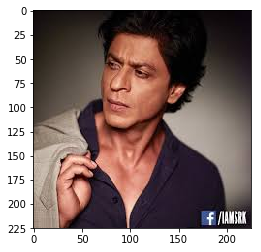

In [15]:
img = plt.imread("images/image1.jpg")
plt.imshow(img)

image2.jpg
image6.jpg
image5.jpg
image3.jpg


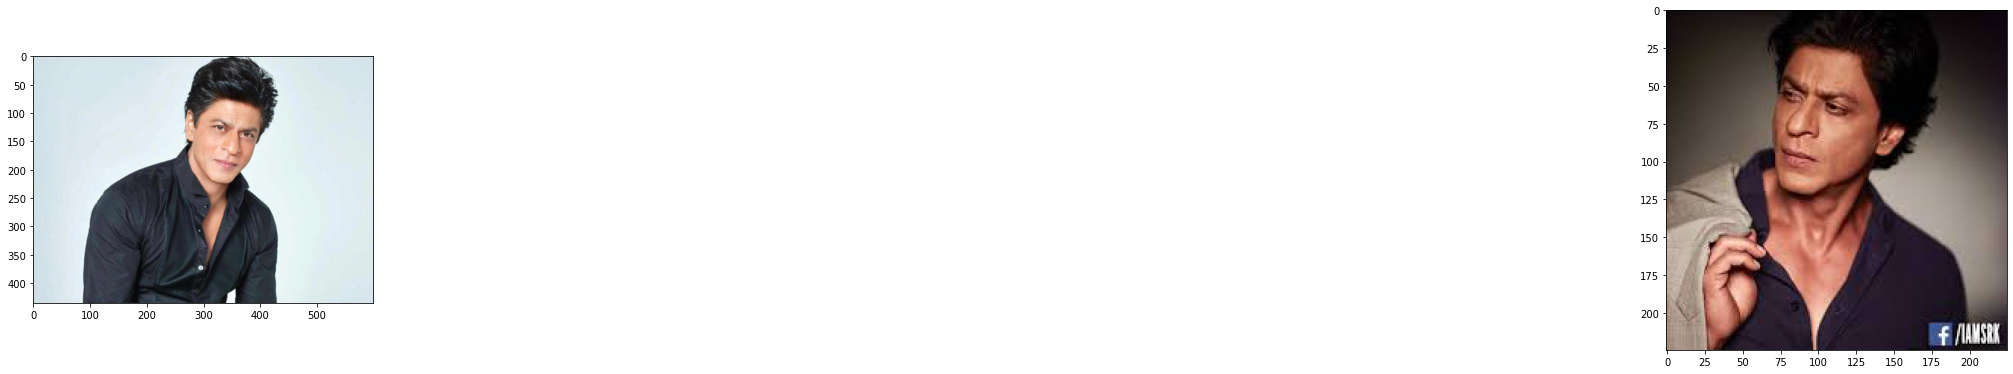

In [53]:
import os
fig = plt.figure(figsize=(50, 50))  # width, height in inches

for i, image in enumerate(os.listdir("images")):
    if image in matched_pairs:
        image = plt.imread(os.path.join("images", image))
        sub = fig.add_subplot(1, 7, i + 1)
        sub.imshow(image)
    else:
        print(image)

In [ ]:
fig, ax = plt.subplots(nrows=len(df), ncols=2)

for i, image in enumerate(images_to_keypoints):
    col = i % 2
    row = i // 2

    matched_image = matched_pairs.get(image, None):
        if matched_image is not None:
            img1 = 
    
    if image in matched_pairs:
        image = plt.imread(os.path.join("images", image))
        sub = fig.add_subplot(1, 7, i + 1)
        sub.imshow(image)

In [48]:
images_to_keypoints.keys()

dict_keys(['image2.jpg', 'image4.jpg', 'image6.jpg', 'image1.jpg'])

In [49]:
matched_pairs

{'image4.jpg': 'image1.jpg', 'image1.jpg': 'image4.jpg'}

In [52]:
print(matched_pairs['image2.jpg'])

KeyError: 'image2.jpg'

In [54]:
lst = ['image2.jpg', 'image4.jpg', 'image6.jpg', 'image1.jpg']

In [55]:
lst.remove("image4.jpg")

In [56]:
lst

['image2.jpg', 'image6.jpg', 'image1.jpg']